In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read data
fb = pd.read_csv('Foreign_Bond.csv') # foreign bonds
fe = pd.read_csv('Foreign_ETF.csv') # foreign equity
db = pd.read_csv('US_bonds.csv') # domestic bonds
de = pd.read_csv('US_ETF.csv') # domestic equity
gld = pd.read_csv('Gold.csv') # gold

In [3]:
# drop rows with invalid monthly returns
fb = fb[fb['dret'].notnull()]
fe = fe[fe['dret'].notnull()]
db = db[db['dret'].notnull()]
de = de[de['dret'].notnull()]
gld = gld[gld['dret'].notnull()]

In [5]:
for i in ['fe','fb','de','db','gld']:
    
    # convert string to float
    eval("{}".format(i))['dret'] = eval("{}".format(i))['dret'].astype(float)
    
    # extract year from date
    eval("{}".format(i))['caldt'] = pd.to_datetime(eval("{}".format(i))['caldt'], format='%Y%m%d')
    eval("{}".format(i))['year'] = pd.DatetimeIndex(eval("{}".format(i))['caldt']).year
 
    # 1 + daily return
    eval("{}".format(i))['return'] = eval("{}".format(i))['dret'] + 1 


# Part 1 - Individual Assets

## Annualized return, annualized standard deviation and Sharpe ratio

Annualized return
1. Calculate the annual returns of 2009-2018
2. Get annualized return by calculating the geometric mean of annual returns

Standard deviation = std(annual returns)

Sharpe ratio = Annualized return / Standard deviation

In [6]:
# calculate annual return
fb_annual_ret = fb[['crsp_fundno','return','year']].groupby(['crsp_fundno','year']).prod() - 1
fb_annual_ret = fb_annual_ret.reset_index()

# calculate annualized return
fb_annualized_return = ((fb_annual_ret['return'][1:]+1).prod())**0.1 - 1

# calculate annualized standard deviation
fb_annualized_std = fb_annual_ret['return'][1:].std()

# calculate sharpe ratio
fb_sharpe = fb_annualized_return/fb_annualized_std

In [7]:
# repeat the same process for fe, db, de and gld
fe_annual_ret = fe[['crsp_fundno','return','year']].groupby(['crsp_fundno','year']).prod() - 1
fe_annual_ret = fe_annual_ret.reset_index()
fe_annualized_return = ((fe_annual_ret['return'][1:]+1).prod())**0.1 - 1
fe_annualized_std = fe_annual_ret['return'][1:].std()
fe_sharpe = fe_annualized_return/fe_annualized_std


db_annual_ret = db[['crsp_fundno','return','year']].groupby(['crsp_fundno','year']).prod() - 1
db_annual_ret = db_annual_ret.reset_index()
db_annualized_return = ((db_annual_ret['return'][1:]+1).prod())**0.1 - 1
db_annualized_std = db_annual_ret['return'][1:].std()
db_sharpe = db_annualized_return/db_annualized_std


de_annual_ret = de[['crsp_fundno','return','year']].groupby(['crsp_fundno','year']).prod() - 1
de_annual_ret = de_annual_ret.reset_index()
de_annualized_return = ((de_annual_ret['return'][1:]+1).prod())**0.1 - 1
de_annualized_std = de_annual_ret['return'][1:].std()
de_sharpe = de_annualized_return/fe_annualized_std


gld_annual_ret = gld[['crsp_fundno','return','year']].groupby(['crsp_fundno','year']).prod() - 1
gld_annual_ret = gld_annual_ret.reset_index()
gld_annualized_return = ((gld_annual_ret['return'][1:]+1).prod())**0.1 - 1
gld_annualized_std = gld_annual_ret['return'][1:].std()
gld_sharpe = gld_annualized_return/gld_annualized_std

## Maximum Drawdown

Window period = 252 days
1. For the first 252 days, maximum is calculated using all the previous days
2. Starting from 01/01/2009，maximum is calculated using the previous 252 days


In [8]:
fe_drawdown = fe[['dnav']]
fb_drawdown = fb[['dnav']]
de_drawdown = de[['dnav']]
db_drawdown = db[['dnav']]
gld_drawdown = gld[['dnav']]

for i in ['fe','fb','de','db','gld']:
    eval("{}_drawdown".format(i))['max'] = 0.0
    for j in range(len(fe)):
        if j < 252:
            eval("{}_drawdown".format(i))['max'][j] = max(eval("{}_drawdown".format(i))['dnav'][:j+1])
        else:
            eval("{}_drawdown".format(i))['max'][j] = max(eval("{}_drawdown".format(i))['dnav'][j+1-252:j+1])
            
    eval("{}_drawdown".format(i))['drawdown'] = (eval("{}_drawdown".format(i))['max'] - eval("{}_drawdown".format(i))['dnav']) / eval("{}_drawdown".format(i))['max']

C:\Users\akize\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\akize\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\akize\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

Print results

In [9]:
print(fb_annualized_return)
print(fb_annualized_std)
print(fb_sharpe)
print(max(fb_drawdown['drawdown']))

0.07249459276310266
0.10344729268496909
0.7007877236949299
0.14565803447430764


In [10]:
print(fe_annualized_return)
print(fe_annualized_std)
print(fe_sharpe)
print(max(fe_drawdown['drawdown']))

0.05770263399510167
0.31422123226249543
0.1836369667944584
0.3986160073116594


In [11]:
print(db_annualized_return)
print(db_annualized_std)
print(db_sharpe)
print(max(db_drawdown['drawdown']))

0.048488109996344786
0.054299990867836455
0.8929671851025259
0.06086956521739144


In [12]:
print(de_annualized_return)
print(de_annualized_std)
print(de_sharpe)
print(max(de_drawdown['drawdown']))

0.12431683049046072
0.0887635520297057
0.3956347239661017
0.3018549747048904


In [13]:
print(gld_annualized_return)
print(gld_annualized_std)
print(gld_sharpe)
print(max(gld_drawdown['drawdown']))

0.03596297867551068
0.16761341200498267
0.21455907522747406
0.33676911641339724


## Cumulative performance over time assuming $100 initial investment

C:\Users\akize\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


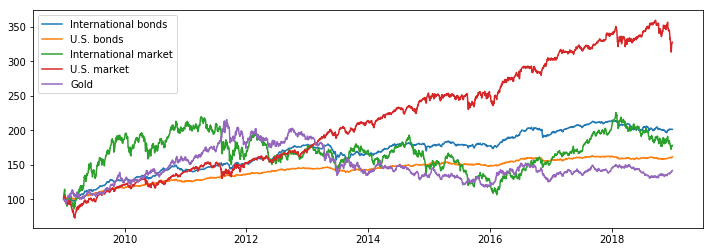

In [14]:
figsize(12,4)
plot(fb['caldt'],100*fb['return'].cumprod(),label='International bonds')
plot(db['caldt'],100*db['return'].cumprod(),label='U.S. bonds')
plot(fe['caldt'],100*fe['return'].cumprod(),label='International market')
plot(de['caldt'],100*de['return'].cumprod(),label='U.S. market')
plot(gld['caldt'],100*gld['return'].cumprod(),label='Gold')
plt.legend()

# Part 2 - Simulated Portfolio

Weight calculation
1. Check if it is the last trading day of the month 
2. Set the weight to the targeted weight if the answer is YES
3. Calculate unbalanced weight if the answer is NO

How to calculate unbalanced weight (= numerator / denominator)
1. the numerator = the weight at the end of previous trading day * (1 + today's return)
2. the denominator = the sum of the numerators for all individual assets

In [15]:
# rebalance at the end of each month

fe['weight'] = 0.25
fb['weight'] = 0.15
de['weight'] = 0.3
db['weight'] = 0.2
gld['weight'] = 0.1
total_weight = pd.Series(np.zeros(len(fe)))


for i in ['fe','fb','de','db','gld']:
    # extract month from date
    eval("{}".format(i))['month'] = pd.DatetimeIndex(eval("{}".format(i))['caldt']).month
    
    # calculate the numerator of unbalanced weight
    eval("{}".format(i))['weight'] = np.where(eval("{}".format(i))['month'].shift(-1) == eval("{}".format(i))['month'],\
                                              eval("{}".format(i))['weight'].shift(-1)* eval("{}".format(i))['return'],\
                                              eval("{}".format(i))['weight'])
    
    # calculate the denominator of unbalanced weight
    total_weight += eval("{}".format(i))['weight']

# calculate final weight
for i in ['fe','fb','de','db','gld']:
    eval("{}".format(i))['weight'] = eval("{}".format(i))['weight']/total_weight
    


In [16]:
# Annualized return, annualized standard deviation and Sharpe ratio
portfolio = pd.DataFrame(np.array([np.zeros(len(fe)),fe['year']]).T,columns=['return','year'])

for i in ['fe','fb','de','db','gld']:
    portfolio['return'] += eval("{}".format(i))['weight'] * eval("{}".format(i))['dret']

portfolio['return'] += 1
p_annual_ret = portfolio.groupby('year').prod() - 1
p_annualized_return = ((p_annual_ret['return']+1)[1:].prod())**0.1 - 1
p_annualized_std = p_annual_ret['return'][1:].std()
p_sharpe = p_annualized_return/p_annualized_std

# Maximum drawdown
portfolio['max'] = 0.0
portfolio['cum_ret'] = portfolio['return'].cumprod()

for i in range(len(portfolio)):
    if i <= 252:
        portfolio['max'][i] = max(portfolio['cum_ret'][:i+1])
    else:
        portfolio['max'][i] = max(portfolio['cum_ret'][i+1-252:i+1])

portfolio['drawdown'] = (portfolio['max'] - portfolio['cum_ret']) / portfolio['max']

In [17]:
print(p_annualized_return)
print(p_annualized_std)
print(p_sharpe)
print(max(portfolio['drawdown']))

0.09780282337339363
0.12947491625470306
0.7553804721603057
0.1419596232295383


# Part 3 - Maximum Sharpe Ratio Portfolio

Steps of finding maximum sharpe ratio portfolio

1. Define a function that generate random weights
2. Generate 1000 sets of weights
3. Calculate annualized return, annualized std and sharpe ratio for every portfolios
4. Find asset weights of the portfolio with maximum sharpe ratio

In [18]:
def random_weights(n):
    ''' generate random weights for 5 assets, 
        s.t sum(weight_i) = 1
            weight_i < 0.45
    '''
    seed(1)
    weight = []
    
    for i in range(n):
        temp = random.random(5)
        temp = temp/sum(temp)
        if len(temp[temp <= 0.45]) == 5:
            weight.append(temp)

    return weight

weight = random_weights(1000)

In [19]:
# Calculate annualized return, annualized std and sharpe ratio for every portfolios
p2_annualized_return = []
p2_annualized_std = []
p2_sharpe = []

total_weight2 = pd.Series(np.zeros(len(fe)))

portfolio2 = pd.DataFrame(np.array([np.zeros(len(fe)),fe['year']]).T,columns=['return','year'])

for ii in range(len(weight)):
    fe['weight'] = weight[ii][0]
    fb['weight'] = weight[ii][1]
    de['weight'] = weight[ii][2]
    db['weight'] = weight[ii][3]
    gld['weight'] = weight[ii][4]


    for i in ['fe','fb','de','db','gld']:
        eval("{}".format(i))['month'] = pd.DatetimeIndex(eval("{}".format(i))['caldt']).month
        eval("{}".format(i))['weight'] = np.where(eval("{}".format(i))['month'].shift(-1) == eval("{}".format(i))['month'],\
                                                  eval("{}".format(i))['weight'].shift(-1)* eval("{}".format(i))['return'],\
                                                  eval("{}".format(i))['weight'])
        total_weight2 += eval("{}".format(i))['weight']

    for i in ['fe','fb','de','db','gld']:
        eval("{}".format(i))['weight'] = eval("{}".format(i))['weight']/total_weight2


    for i in ['fe','fb','de','db','gld']:
        portfolio2['return'] += eval("{}".format(i))['weight'] * eval("{}".format(i))['dret']

    portfolio2['return'] += 1
    p_annual_ret = portfolio2.groupby('year').prod() - 1
    p2_annualized_return.append(((p_annual_ret['return']+1).prod())**0.1 - 1)
    p2_annualized_std.append(p_annual_ret['return'].std())
    p2_sharpe.append(p2_annualized_return[ii]/p2_annualized_std[ii])
    
    total_weight2 = pd.Series(np.zeros(len(fe)))

    portfolio2 = pd.DataFrame(np.array([np.zeros(len(fe)),fe['year']]).T,columns=['return','year'])



In [20]:
# find asset weights of the portfolio with maximum sharpe ratio
best_weight = weight[p2_sharpe.index(max(p2_sharpe))]
best_weight

array([0.0058641 , 0.18859125, 0.42194043, 0.34827228, 0.03533195])

In [21]:
# Annualized return, annualized std and sharpe ratio for maximum sharpe ratio portfolio
fe['weight'] = best_weight[0]
fb['weight'] = best_weight[1]
de['weight'] = best_weight[2]
db['weight'] = best_weight[3]
gld['weight'] = best_weight[4]
total_weight3 = pd.Series(np.zeros(len(fe)))

for i in ['fe','fb','de','db','gld']:
    eval("{}".format(i))['month'] = pd.DatetimeIndex(eval("{}".format(i))['caldt']).month
    eval("{}".format(i))['weight'] = np.where(eval("{}".format(i))['month'].shift(-1) == eval("{}".format(i))['month'],\
                                              eval("{}".format(i))['weight'].shift(-1)* eval("{}".format(i))['return'],\
                                              eval("{}".format(i))['weight'])
    total_weight3 += eval("{}".format(i))['weight']

for i in ['fe','fb','de','db','gld']:
    eval("{}".format(i))['weight'] = eval("{}".format(i))['weight']/total_weight3
    
p_best = pd.DataFrame(np.array([np.zeros(len(fe)),fe['year']]).T,columns=['return','year'])

for i in ['fe','fb','de','db','gld']:
    p_best['return'] += eval("{}".format(i))['weight'] * eval("{}".format(i))['dret']

p_best['return'] += 1
p_best_annual_ret = p_best.groupby('year').prod() - 1
p_best_annualized_return = ((p_best_annual_ret['return']+1).prod())**0.1 - 1
p_best_annualized_std = p_best_annual_ret['return'].std()
p_best_sharpe = p_best_annualized_return/p_best_annualized_std

# Maximum drawdown for maximum sharpe ratio portfolio
p_best['max'] = 0.0
p_best['cum_ret'] = p_best['return'].cumprod()

for i in range(len(p_best)):
    if i <= 252:
        p_best['max'][i+1] = max(p_best['cum_ret'][:i+1])
    else:
        p_best['max'][i+1] = max(p_best['cum_ret'][i+1-252:i+1])

p_best['drawdown'] = (p_best['max'] - p_best['cum_ret']) / p_best['max']

In [22]:
print(p_best_annualized_return)
print(p_best_annualized_std)
print(p_best_sharpe)
print(max(p_best['drawdown']))

0.0953819956945221
0.07168798087101264
1.3305158624308562
0.14174136559514772


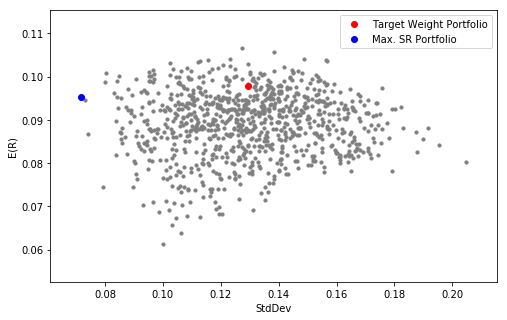

In [23]:
figsize(8,5)
scatter(p2_annualized_std,p2_annualized_return,c='grey',s=10)
scatter(p_annualized_std,p_annualized_return,c='red',label='Target Weight Portfolio')
scatter(p_best_annualized_std,p_best_annualized_return,c='blue',label='Max. SR Portfolio')
xlabel('StdDev')
ylabel('E(R)')
legend()

Cumulative performance over time assuming $100 initial investment

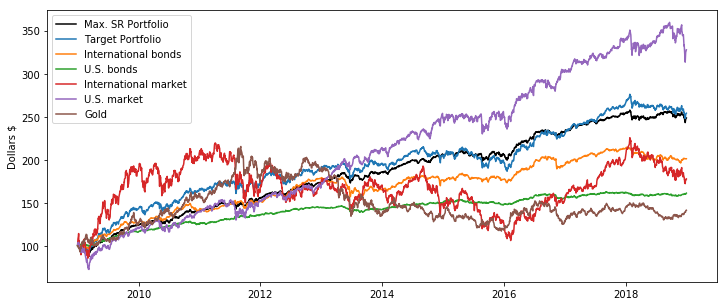

In [24]:
figsize(12,5)
plot(fb['caldt'],100*p_best['return'].cumprod(),label='Max. SR Portfolio',c='black')
plot(fb['caldt'],100*portfolio['return'].cumprod(),label='Target Portfolio')
plot(fb['caldt'],100*fb['return'].cumprod(),label='International bonds')
plot(db['caldt'],100*db['return'].cumprod(),label='U.S. bonds')
plot(fe['caldt'],100*fe['return'].cumprod(),label='International market')
plot(de['caldt'],100*de['return'].cumprod(),label='U.S. market')
plot(gld['caldt'],100*gld['return'].cumprod(),label='Gold')
plt.ylabel('Dollars $')
plt.legend()